In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [11]:
import pandas as pd

# Load dataset (ensure it's in the same folder)
bank_df = pd.read_csv("bank.csv")  # Or 'BankMarketing.csv' if that's your file

In [12]:
print(bank_df.head())        # Show first 5 rows
print(bank_df.info())        # Data types and nulls
print(bank_df.describe())    # Summary statistics


  age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0  30;"unemployed";"married";"primary";"no";1787;...                                                                                                  
1  33;"services";"married";"secondary";"no";4789;...                                                                                                  
2  35;"management";"single";"tertiary";"no";1350;...                                                                                                  
3  30;"management";"married";"tertiary";"no";1476...                                                                                                  
4  59;"blue-collar";"married";"secondary";"no";0;...                                                                                                  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 

In [13]:
# Check for nulls
print(bank_df.isnull().sum())

# Drop or fill missing values
bank_df.dropna(inplace=True)  # Removes rows with missing values
# bank_df.fillna(method='ffill', inplace=True)  # Optional: fill missing values


age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"    0
dtype: int64


In [16]:
print(bank_df.columns)


Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')


In [21]:
bank_df = pd.read_csv("bank.csv", sep=';')

In [22]:
print(bank_df.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [23]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
bank_df['job'] = label_enc.fit_transform(bank_df['job'])


In [24]:
bank_df = pd.read_csv("bank.csv", sep=';')


In [25]:
print(bank_df.head())
print(bank_df.info())
print(bank_df.describe())


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #  

In [26]:
print(bank_df.isnull().sum())


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [27]:
label_enc = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in categorical_cols:
    bank_df[col] = label_enc.fit_transform(bank_df[col])


In [29]:

from sklearn.preprocessing import StandardScaler


In [30]:
from sklearn.preprocessing import StandardScaler  # <-- Add this if missing

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

bank_df[num_cols] = scaler.fit_transform(bank_df[num_cols])


In [31]:
X = bank_df.drop('y', axis=1)
y = bank_df['y']


In [33]:
from sklearn.model_selection import train_test_split


In [34]:
from sklearn.model_selection import train_test_split  # ✅ Fix import

# Separate features (X) and target (y)
X = bank_df.drop('y', axis=1)
y = bank_df['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.linear_model import LogisticRegression


In [37]:
from sklearn.linear_model import LogisticRegression  # ✅ Import this

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  

# Predict the test set
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8939226519337017
Confusion Matrix:
 [[791  16]
 [ 80  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.53      0.18      0.27        98

    accuracy                           0.89       905
   macro avg       0.72      0.58      0.61       905
weighted avg       0.87      0.89      0.87       905



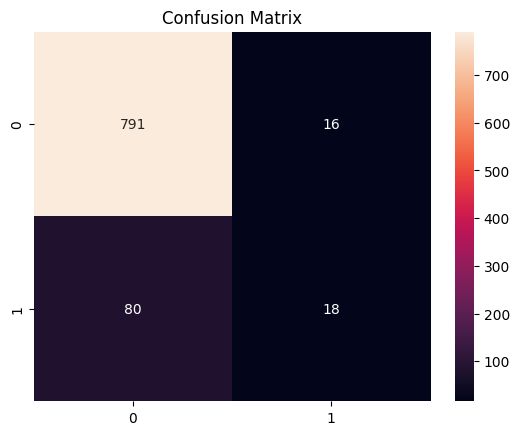

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined earlier in your code
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
